In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
from src.dm import DataModule

dm = DataModule(batch_size=2, false_color=True, bands=[10,11,12,8,9], t=[4,5,6], train_trans={
    'HorizontalFlip': {'p': 0.5},
	'VerticalFlip': {'p': 0.5},
	'RandomRotate90': {'p': 0.5},
	'Transpose': {'p': 0.5}
    }
)
dm.setup()

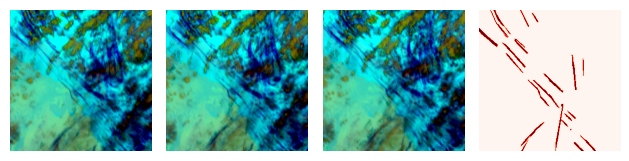

In [30]:
import matplotlib.pyplot as plt

images, masks = next(iter(dm.train_dataloader(shuffle=False)))

ix = 1
fig = plt.figure()
ax = fig.add_subplot(1, 4, 1)
ax.imshow(images[ix][...,0,:3])
ax.axis('off')
ax = fig.add_subplot(1, 4, 2)
ax.imshow(images[ix][...,1,:3])
ax.axis('off')
ax = fig.add_subplot(1, 4, 3)
ax.imshow(images[ix][...,2,:3])
ax.axis('off')
ax = fig.add_subplot(1, 4, 4)
ax.imshow(masks[ix], cmap='Reds')
ax.axis('off')
plt.tight_layout()
plt.show()